# DataGene - Data Comparison Toolbox

To go back to the GitHub [repository](https://github.com/firmai/datagene). 

The purpose of this package is to compare datasets for similarity. Why would we be interested in dataset-similarity and not just the utility or predictive quality of the data? The most important reason is to preserve the interpretability of the results. If the sole purpose of the generated data is to be used in black-box machine learning models, then simillarity is not a prerequisite, but for just about any other reason, data similarity is a must. Think along the lines of feature importance scores, data exploration, causal and associative analysis, decision-making, anomaly detection, scenario analysis, and software development.

There is a slight difference between testing dataset quality and testing models performance using data, for datasets comparison we test one dataset versus many, for models it is many datasets versus many datasets. In which case you might move into high-order tensors like tessaracts. Whether you want to compare a few datasets or series of datasets, this package would enable you to move into the appropriate dimension.

*This package draws inspiration from a range of methods developed or expounded on by researchers outside and inside the Turing ([signitures](https://www.turing.ac.uk/research/interest-groups/rough-paths), [sktime](https://github.com/alan-turing-institute/sktime) and [quipp](https://github.com/alan-turing-institute/QUIPP-pipeline)). The data has been generated in the following [Colab](https://colab.research.google.com/drive/1_jrYUR7Rwl-8vGSAEFt4hSiXmUZf040g?usp=sharing); the model has been developed by Turing Fellow, [Mihaela van der Schaar](https://www.turing.ac.uk/people/researchers/mihaela-van-der-schaar).*

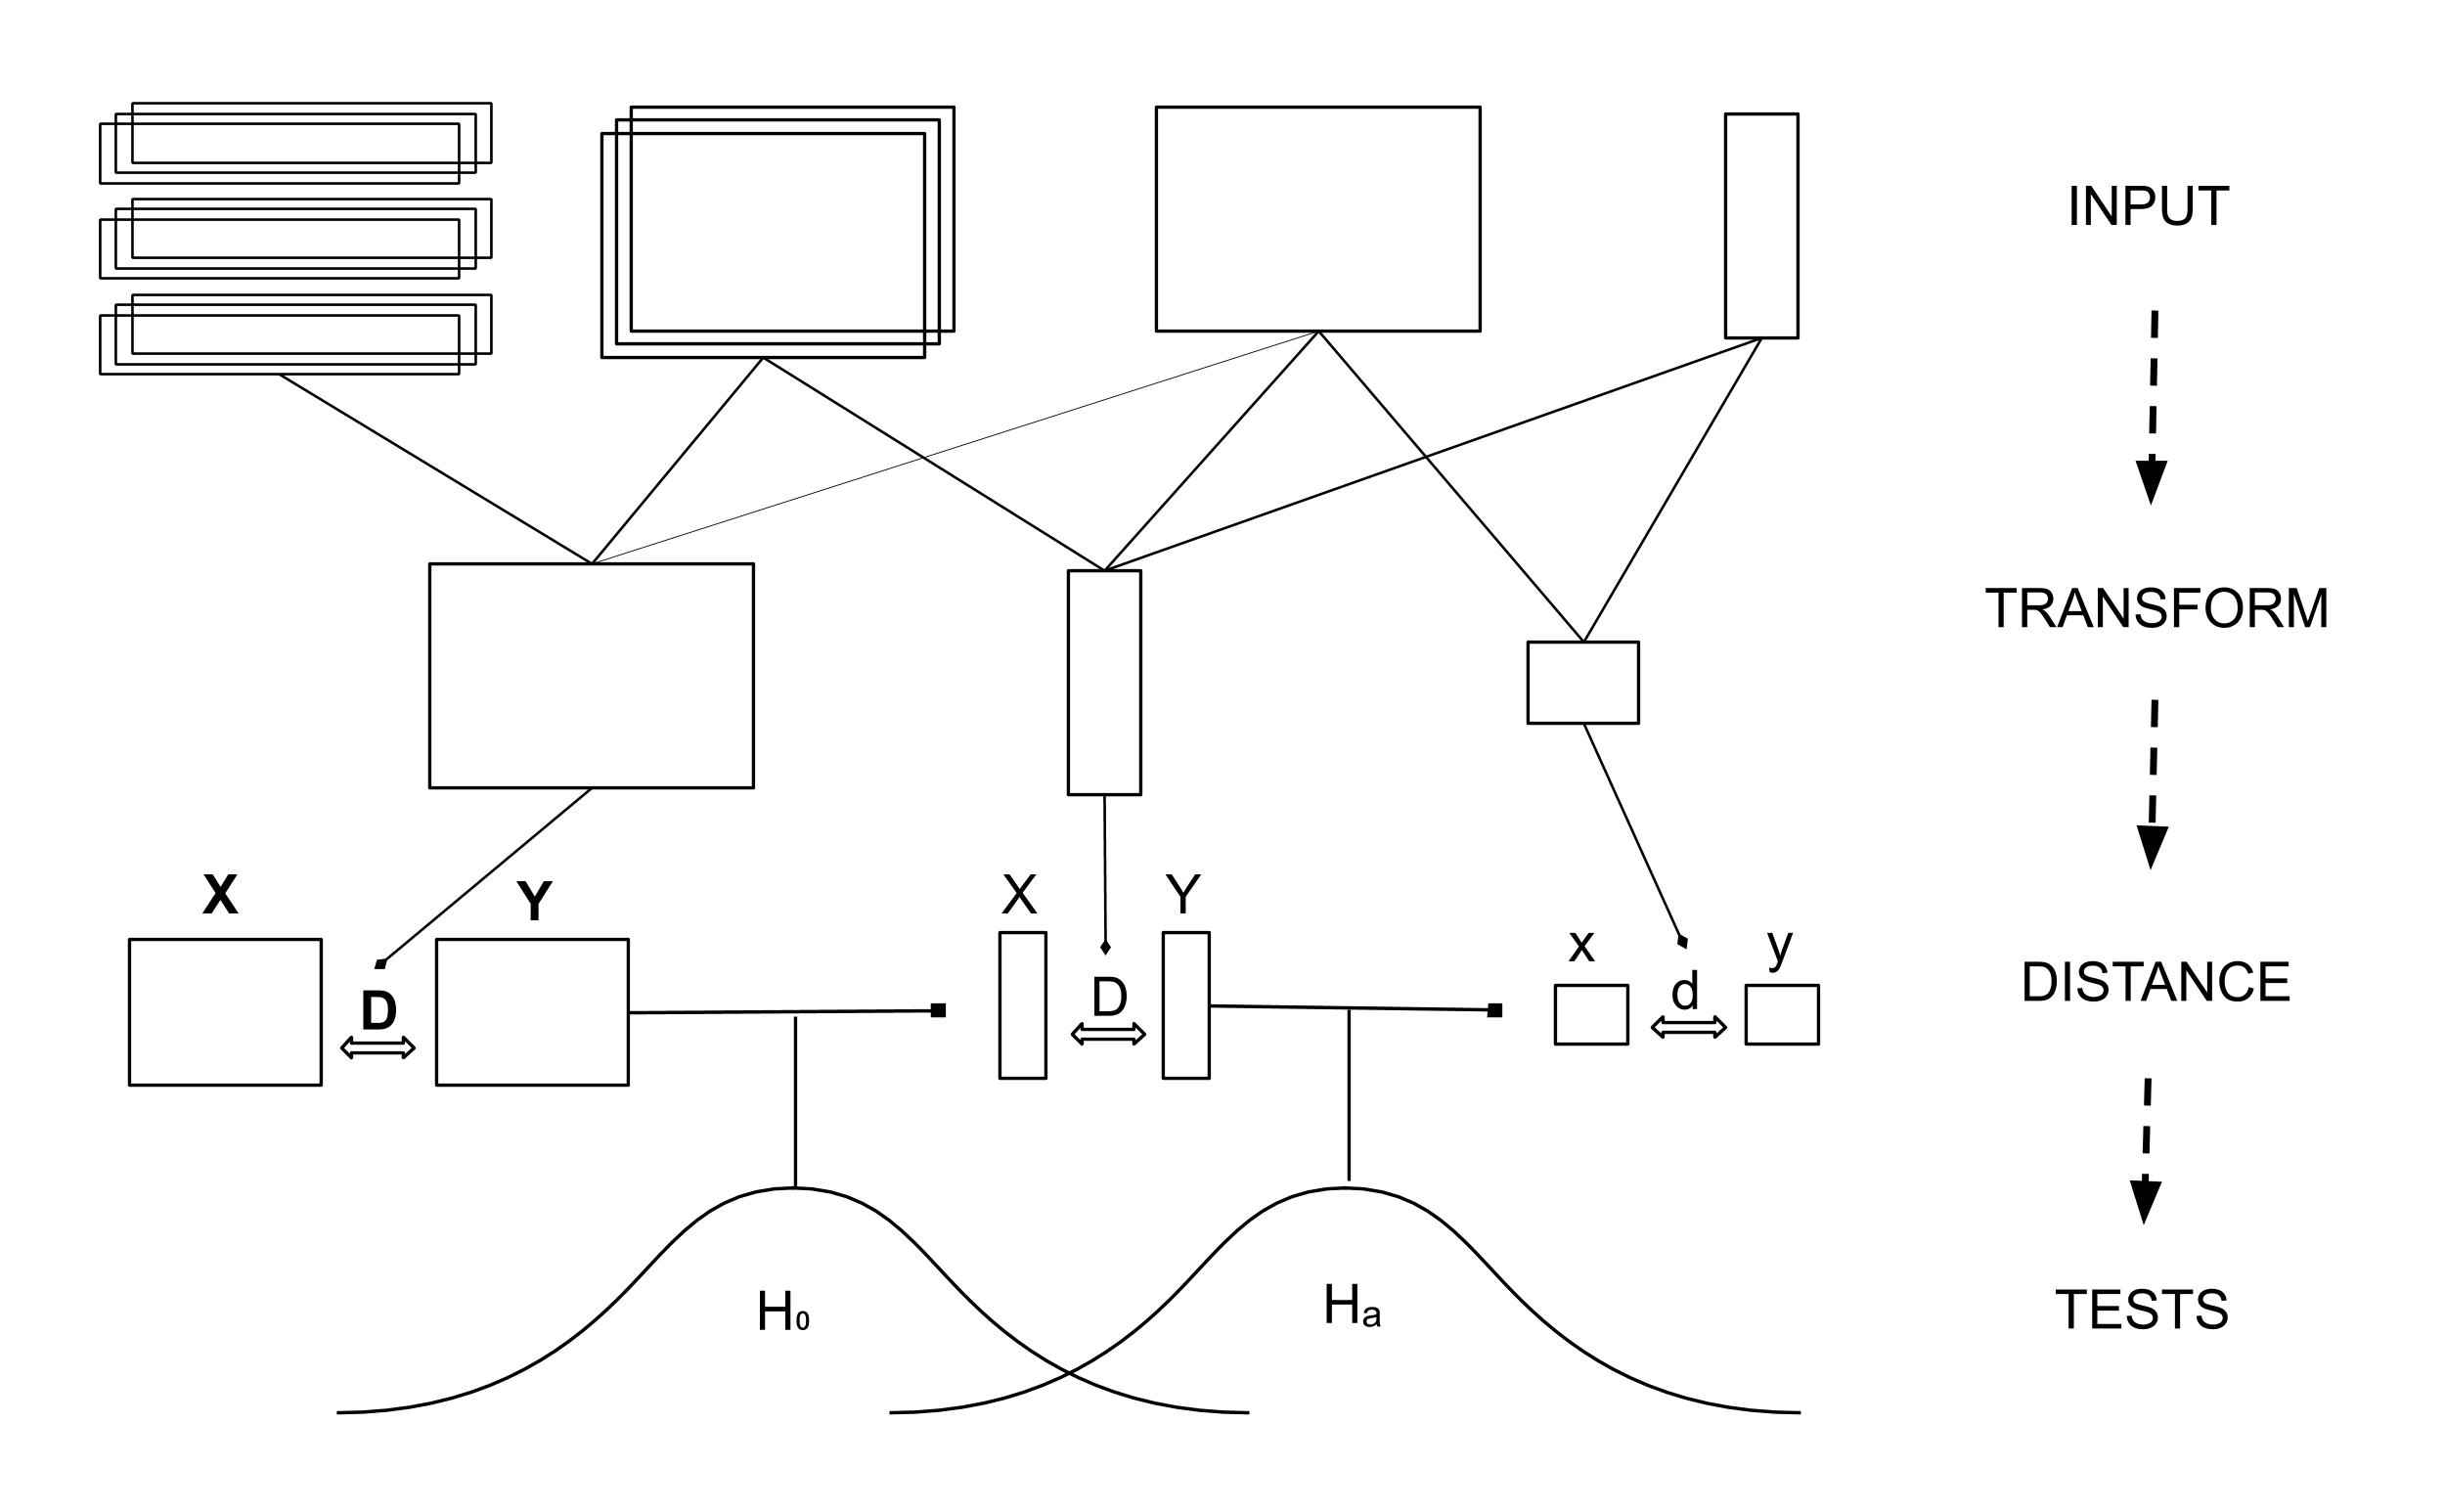

```Vectors, matrices, tensors, and tesseracts take the respective forms, 1D array, 2D array, 3D array, and 4D array; singular values are referred to as scalars. We have decided to settle on colloquial terms by referring to a tensor as a 3D array and a tesseract as a 4D array as opposed to using the terms tensor rank-3 and tensor rank-4 or even cubic array and hypercubic array.```

Datasets can largely be compared using quantitative and visual methods. Generated data can take on many formats, it can consist of multiple dimensions of various widths and heights. Original and generated datasets have to be transformed into an acceptable format before they can be compared, these transformation sometimes leads to a reduction in array dimensions. There are two reasons why we might want to reduce array dimensions, the first is to establish an acceptable format to perform distance calculations; the second is the preference for comparing like with like. The concatenated samples in a generated array are assumed independent from that of the original data and an aggregation across all samples could lead to more accurate and interpretable distance statistics. For that reason, data similarity is a function, of not just distance calculations and statistics, but also data transformations.


Other pacakages, [FairPut](https://colab.research.google.com/drive/1uxSP5_CuhxjjhcT_iIeL6lsmx1gwO5B6), [DeltaPy](https://colab.research.google.com/drive/1-uJqGeKZfJegX0TmovhsO90iasyxZYiT), [AtsPy](https://colab.research.google.com/drive/14QVrnVtT434s-xYcalHFlQg-o658nekv)



**Introduction:**

----------
1. Load Data
1. Install Packages
1. Utilities



**(A) Transformations:**

----------
1. From Tesseract
  1. To Tensor & Matrix
    - Matrix Product State
1. From Tensor
  1. To Tesseract
    - Multivariate Gramian Angular Encoding
    - Multivariate Recurrence Plot
    - Multivariate Markov Transition Fields

  1. To Tensor
    - Matrix Product State
    - Recurrence Plot

  1. To Matrix
    - Aggregates
    - Tucker
    - CANDECOMP
    - Sample PCA

1. From Matrix
  1. To Tensor
    - Recurrence Plot
    - Gramian Angular Field
    - Markov Transition Field

  1. To Matrix
    - PCA
    - SVD
    - QR 
    - Feature Kernels
    - Covariance
    - Correlation Matrix
    - 2D Histogram
    - Pairwise Distance
    - Pairwise Recurrence Plot
  1. To Vector
    - PCA Single Component
    - Histogram Filter
1. From Vector
  1. To Matrix
    - Signitures Method
  1. To Vector
    - Extraction
    - Autocorrelation

**(B) Visualisations:**

----------
1. Convert Arrays to Images
1. Histogram
1. Signiture
1. Gramian
1. Recurrence
1. Markov Transition Fields
1. Correlation Matrix
1. Pairplot
1. Cord Lenght


**(C) Distance Measures:**

----------


1. Tensor/Matrix
  1. Contribution Values
    1. Predictions
    1. Feature Ordering
    1. Direction Divergence
    1. Effect Size
1. Matrix
  1. Structural Similarity
  1. Similarity Histogram
  1. Hash Similarity
  1. Distance Matrix Hypothesis Test
  1. Dissimilarity Measures
  1. Statistical and Geometric Measures
1. Vectors
  1. PCA Extracted Variance Explained
  1. Statistical and Geometrics Distances
  1. Geometric Distance Feature Map
  1. Curve Metrics
  1. Curve Metrics Feature Map
  1. Hypotheses Distance



### Introduction

**Motivation**

The reason why one would want to emphasise data relationships is the importance of data integrity in the data science process. Generating data that preserves the predictive signal but increases the relationship noise might be beneficial for a black-box prediction task, but that is about it. 

This method is predicated on two ideas; the first being that certain distance and statistical metrics are only available, or are best tested, on data-structures of specific dimensions; the second, that lower and higher dimensional representations of data might lead to a better understanding of non-linear relationships within the data. 

Input data therefore generally requires a transformation (i.e. covariance matrix) plus a distance metric between the two transformed datasets in question (average element-wise euclidean distance). In such a way, one can develop transformation-distance recipes that best capture differences in you data. 

The benefit of an approach that catalogues various methods, is that the effectiveness of various transormation plus distance recipes can be tested against data that have been generated with known to be optimal vs non-optimal procedures by comparing the learning curves of discriminator and generator losses over time. One would then be able to emperically validate the performance of every distinct recipe. 

This package would eventually carry two streams of data statistics, those for time-series and those from cross-sectional data. 

**Transformations**

For most distance measures, we would prefer non-sample specific comparisons. Real versus generated sample-specific distance could be usefull as a measure of the overall bias of the generated data. Generally we also want to focus on the relationships and not just feature (columnular) bias, in which case it is important that the transformations blend the samples into the lower dimension for a row-agnostic comparison. Decomposition helps to decrease the data-structure dimensionality, and encoding increases it. A recipe could theoretically transform the data-structure up a dimension and brings it down again, and by virtue of this process could help to expose non-linear relationships.

Multivariate time series data are generally generated as chunks of two dimensional arrays. These chunks can be captured in an additional dimension to create a rank three tensor. In such a scenario we might face a problem because of a lack of tensor comparison techniques. In other circumstances, one might start with a lower dimensional array but have the need to identify higher dimensional relationships and therefore perform encoding functions that lead to high-dimensional data structures. 

Either way, there is a need to transform data to a lower acceptable dimensions to perform similarity calculations. For that reason we might want to transform a tesseract to a cubed tensor, a tensor to a matrix, and a matrix to a vector. With each additional transformation data similarity techniques become easier to perform. To do this we can use factorization, aggregation and other customised techniques. Some distance metrics have been adapted into statistical tests, the benefit of statistical tests is that we can set thresholds for what we will be comfortable with. We can also set thresholds with standardised data.


***Types of Transformations:***
1. Data transformations to blend in samples\*. (preferred)
1. Transformations to decrease feature dimensions. (sometimes preferred)
1. Additional transformations for distance functions. (sometimes needed)
1. Additional transformations for hypotheses tests. (sometimes needed)

Example of Blend Operations:
1. KDE lines.
1. Sort of data.
1. Cummulative sum. 
1. PCA on Features. 
1. 2D Histogram.


\*Moving away from element-wise sample comparison towards structured comparisons.



# Time Series

**Don't run the next two code blocks, they are just for development purpose. Run the next blocks.**

##### Install Packages

In [ ]:
# %%capture
# ### All required packages installed in advance 
# !pip install tensorly
# !pip install pyts
# !pip install shap
# !pip install scikit-image==0.15
# !pip install porespy
# !pip install ImageHash
# !pip install esig
# !pip install deltapy
# !pip install scikit-image
# !pip install hoggorm
# !pip install git+git://github.com/FirmAI-Research/ecopy.git
# !pip install pandasvault

You have the ability to fork your own version of the code, and adapt the libraries here: https://github.com/firmai/datagene/tree/master/datagene



In [ ]:
# # You can now work on your local code editor, push to github, restart and run..
# # .. while developing online (in colab) 
# import httpimport

# with httpimport.github_repo('firmai', 'datagene', branch = 'master'):
#   from datagene import distance as dist
#   from datagene import transform as tran
#   from datagene import mod_utilities as mod
#   from datagene import dist_utilities as distu
#   from datagene import vis_utilities as visu

**Start Here**

In [ ]:
%%capture
!pip install datagene
!pip install git+git://github.com/FirmAI-Research/ecopy.git

In [ ]:
from datagene import distance as dist
from datagene import transform as tran
from datagene import mod_utilities as mod
from datagene import dist_utilities as distu
from datagene import vis_utilities as visu

Using GAN methods, we can reproduce or generate data of any dimensional type. Before the generation of synthetic datasets, we generally have an idea of the type of problem we want to solve. If it is a prediction problem that requires the anonimisation of data, one might prefer to generate data in a prediction-ready format. 

In this example, the generated data is prepackaged for a prediction problem. It contains the standard 6 market data features, including the different price attributes (close, open etc.) and volume for a time series of Google's Stocks price for 3661 days. The generated data is constructed such that it looks back for 24 time-steps. We therefore have a three-dimensional data structure (array) when we include the sample dimension. 

The first step in the comparison process is to ensure that all the data fits within one data structure, as this is a requirement for future transformation and distance metrics. Each of the above arrays, the generated version (gen_1) and the real verion (org) consists of 3661 samples of 2D arrays (matrices) with six features and 24 time steps each. In total the size is 3661 x 6 x 24 (527184.

We largely want to compare these two groups of data to identify how simlilar they are. What follows are some techniques that can facilitate this test for similarity. In a sense this then are not simply a library for comparison, but a library for data transformation, distance measurement, and statistical tests. Because we are working with distance metrics, it is better to normalise the datasets from the get go. 


In [ ]:
import pickle
import numpy as np
import cloudpickle as cp
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cv2

# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
# %cd "/content/drive/My Drive/FirmAI/DataGene/data"

def scale_array(arr):
  x_min = arr.min(axis=(1, 2), keepdims=True)
  x_max = arr.max(axis=(1, 2), keepdims=True)
  arr = (arr - x_min)/(x_max-x_min)
  return arr

def load_data(file_name="pickle.p",url=True):
  if url:
    arr = cp.load(urlopen(file_name))
  else:
    arr = pickle.load(open(file_name, "rb"))
  arr = np.stack(arr)
  arr = scale_array(arr)
  shape_arr = arr.shape
  shape_text = "{}, shape: samples={}, steps={}, features={}".format(file_name,*shape_arr)
  
  print(shape_text)
  return arr

# The order of the data is original, thorough generation (potentially more similar), ..
# ..short generation (potentially less similar)
path = "https://github.com/firmai/tsgan/blob/master/alg/timegan/gendata/"
org = load_data(path + "original_ts.p?raw=true")
gen_1 = load_data(path + "generated_ts_1.p?raw=true") ## went for 500 iterations
gen_2 = load_data(path + "generated_ts_2.p?raw=true") ## went for 100 iterations

## control for the euclidean distance

gen_1 = gen_1+(gen_2-gen_1).mean()

datasets = [org, gen_1, gen_2]

print("Attribute dimensions should be in this order, ensure it makes sense")

samples_n =  org.shape[0]
rows_n = org.shape[1]
features_n = org.shape[2]

https://github.com/firmai/tsgan/blob/master/alg/timegan/gendata/original_ts.p?raw=true, shape: samples=3661, steps=24, features=6
https://github.com/firmai/tsgan/blob/master/alg/timegan/gendata/generated_ts_1.p?raw=true, shape: samples=3661, steps=24, features=6
https://github.com/firmai/tsgan/blob/master/alg/timegan/gendata/generated_ts_2.p?raw=true, shape: samples=3661, steps=24, features=6
Attribute dimensions should be in this order, ensure it makes sense


Scaling Sanity Check (Same Pattern Expected)

[<matplotlib.lines.Line2D at 0x7f38a97f7a90>]

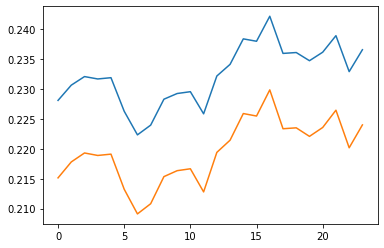

In [ ]:
arr = cp.load(urlopen(path + "original_ts.p?raw=true"))
arr = np.stack(arr)
plt.plot(arr[0,:,0])
plt.plot(org[0,:,0]*arr[0,:,0].mean())

## Start

#### Load Data

#### Transformation Recipes

*You have the ability to work with 2D and 3D generated data. This notebook will work with a 3D time series array. Data has to organised as samples, times steps, features, ```[i,s,f]```. If you are working with a 2D array, the data has to be organised as samples, features ```[i,f]```.*

Lego Building

This first recipe uses six arbitary transformations to identify the similarity of datasets. As an analogy, imagine you importing similar looking oranges from two different countries, and you want to see whether there is a difference in the constitution of these oranges. To do that you might follow a six step process, first you press the oranges for pulp, then you boil the pulp, you then maybe sift the pulp out and drain the juice, you add apple juice to the pulp, and then add an organge concentrate back to the pulp, you then dry the concoctions on a translucent petri dish and shine light through the petri dish to identify differences in patterns using various distance metrics. You might want to do the process multiple times and establish an average and possibly even a significance score. The transformation part, is the process we put the data through to be ready for similarity calculations.

From Tesseract:

```tran.mps_decomp_4_to_2()```

&nbsp;

From Tensor:

```tran.gaf_encode_3_to_4()```

```tran.mrp_encode_3_to_4()```

```tran.mtf_encode_3_to_4()```

```tran.mps_decomp_3_to_2()```

```tran.jrp_encode_3_to_3()```

```tran.mean_3_to_2()```

```tran.sum_3_to_2()```

```tran.min_3_to_2()```

```tran.var_3_to_2()```

```tran.tucker_decomp_3_to_2()```

```tran.parafac_decomp_3_to_2()```

```tran.pca_decomp_3_to_2()```

&nbsp;

From Matrix:

```tran.rp_encode_2_to_3()```

```tran.gaf_encode_2_to_3()```

```tran.mtf_encode_2_to_3()```

```tran.pca_decomp_2_to_2()```

```tran.pca_decomp_2_to_2()```

```tran.svd_decomp_2_to_2()```

```tran.qr_decomp_2_to_2()```

```tran.lik_kernel_2_to_2()```

```tran.cos_kernel_2_to_2()```

```tran.pok_kernel_2_to_2()```

```tran.lak_kernel_2_to_2()```

```tran.cov_2_to_2()```

```tran.corr_2_to_2()```

```tran.hist_2d_2_to_2()```

```tran.pwd_2_to_2()```

```tran.prp_encode_2_to_2()```

```tran.pca_decomp_2_to_1()```

&nbsp;

From Vector:

```tran.sig_encode_1_to_2()```

```tran.vect_extract_1_to_1()```

```tran.autocorr_1_to_1()```




In [ ]:
%%capture

def transf_recipe_1(arr):
  return (tran.pipe(arr)[tran.mrp_encode_3_to_4]()
            [tran.mps_decomp_4_to_2]()
            [tran.gaf_encode_2_to_3]()
            [tran.tucker_decomp_3_to_2]()
            [tran.qr_decomp_2_to_2]()
            [tran.pca_decomp_2_to_1]()
            [tran.sig_encode_1_to_2]()).value

recipe_1_org,recipe_1_gen_1,recipe_1_gen_2 = transf_recipe_1(datasets)


Now apply some distance metric

this is just a simple examples of a distance metric

In [ ]:
distu.simple_diff_ratio(recipe_1_org,recipe_1_gen_1)
distu.simple_diff_ratio(recipe_1_org,recipe_1_gen_2)

3.5579016665252143
3.3640141301555357


Reorder The Transformations

In [ ]:
%%capture
def transf_recipe_2(arr):
  return (tran.pipe(arr)[tran.mrp_encode_3_to_4]()
            [tran.mps_decomp_4_to_2]()
            [tran.qr_decomp_2_to_2]()
            [tran.pca_decomp_2_to_1]()
            [tran.sig_encode_1_to_2]()
            [tran.gaf_encode_2_to_3]()
            [tran.tucker_decomp_3_to_2]()).value

recipe_2_org,recipe_2_gen_1,recipe_2_gen_2 = transf_recipe_2(datasets)

In [ ]:
distu.simple_diff_ratio(recipe_2_org,recipe_2_gen_1)
distu.simple_diff_ratio(recipe_2_org,recipe_2_gen_2)

2.1390430577887662
0.7686782933437846


#### Distance Recipes

Tensor/Matrix

```dist.regression_metrics()``` - prediction errors metrics

```mod.shapley_rank()``` + ```dist.boot_stat()``` - statistical feature rank correlation

```mod.shapley_rank()``` - feature direction divergence

```mod.shapley_rank()``` + ```dist.stat_pval()``` - statistical feature divergence significance


Matrix

```dist.ssim_grey()``` - structural grey image similarity

```dist.image_histogram_similarity()``` - histogram image similarity

```dist.hash_simmilarity()``` - hash image similarity

```dist.distance_matrix_tests()``` - distance matrix hypothesis tests

```dist.entropy_dissimilarity()``` - non-parametric entropy multiples

```dist.matrix_distance()``` - statistical and geometrics distance measures


Vector

```dist.pca_extract_explain()``` - pca extraction variance explained

```dist.vector_distance()``` - statistical and geometric distance measures

```dist.distribution_distance_map()``` - Geometric Distribution Distances Feature Map

```dist.curve_metrics()``` - curve comparison metrics

```dist.curve_kde_map()``` - dist.curve_metrics kde feature map

```dist.vector_hypotheses()``` - vector statistical tests


Examples

In [ ]:
dist.entropy_dissimilarity(recipe_2_org,recipe_2_gen_1)

OrderedDict([('incept_multi', 0.01992),
             ('cent_multi', 0.05068),
             ('corexdc_multi', 0.02256),
             ('ctcdc_mult', 0.02558),
             ('mutual_mult', 1.67905),
             ('minfo', 0.1831)])

In [ ]:
dist.entropy_dissimilarity(recipe_2_org,recipe_2_gen_2)

OrderedDict([('incept_multi', 0.01369),
             ('cent_multi', 0.06171),
             ('corexdc_multi', 0.0483),
             ('ctcdc_mult', 0.05365),
             ('mutual_mult', 0.0565),
             ('minfo', 0.09089)])

In [ ]:
dist.matrix_distance(recipe_2_org,recipe_2_gen_1)

OrderedDict([('correlation', 0.00012),
             ('intersection', 0.0),
             ('renyi_divergence', nan),
             ('pearson_rho', 0.0),
             ('jensen_shannon_divergence', nan),
             ('ks_statistic_kde', 0.08679),
             ('js_metric', 0.1331),
             ('dice', 1.82572),
             ('kulsinski', 0.00057),
             ('rogerstanimoto', 0.15975),
             ('russellrao', 5.4878),
             ('sokalmichener', 0.15975),
             ('sokalsneath', 0.00499),
             ('yule', 0.03747),
             ('braycurtis', 0.18973),
             ('directed_hausdorff', 5.46186),
             ('manhattan', 7.09552),
             ('chi2', 0.61503),
             ('euclidean', 5.67253),
             ('variational', 7.09552),
             ('kulczynski', nan),
             ('bray', 0.19094),
             ('gower', 0.3304),
             ('hellinger', 0.01532),
             ('czekanowski', 0.54581),
             ('whittaker', 0.00292),
             ('canber

In [ ]:
dist.matrix_distance(recipe_2_org,recipe_2_gen_2)

OrderedDict([('correlation', 0.00013),
             ('intersection', 0.12158),
             ('renyi_divergence', nan),
             ('pearson_rho', 0.0),
             ('jensen_shannon_divergence', nan),
             ('ks_statistic_kde', 0.02494),
             ('js_metric', 0.01413),
             ('dice', 0.54112),
             ('kulsinski', 0.00028),
             ('rogerstanimoto', 0.06088),
             ('russellrao', 1.20858),
             ('sokalmichener', 0.06088),
             ('sokalsneath', 0.00178),
             ('yule', 0.01207),
             ('braycurtis', 0.06086),
             ('directed_hausdorff', 1.19254),
             ('manhattan', 1.77271),
             ('chi2', 0.10036),
             ('euclidean', 1.2608),
             ('variational', 1.77271),
             ('kulczynski', nan),
             ('bray', 0.06209),
             ('gower', 0.16514),
             ('hellinger', 0.01595),
             ('czekanowski', 0.13636),
             ('whittaker', 0.00253),
             ('

## Documentation By Example
-----------

## (A) Transformation





The purpose of the transformations is to get the original and generated datasets in a format that is appropriate to identify the similarities between them. Here I have listed the multiple transformation types, with a simplified distance metrics.

### Tesseract:

#### **From Tesseract to Tensor and Matrix**

##### Decomposition

###### *Matrix Product State (Tensor Train Decomposition)*



In [ ]:
ds_mps = [np.expand_dims([data.mean(axis=0)]*5, 0) for data in datasets] #hypothetical datasets

mps_ff_2d_org, mps_ff_2d_gen_1, mps_ff_2d_gen_2  = tran.mps_decomp_4_to_2(ds_mps, dim=5)

distu.simple_diff_ratio(mps_ff_2d_org,mps_ff_2d_gen_1)
distu.simple_diff_ratio(mps_ff_2d_org,mps_ff_2d_gen_2)

Tensor Shape:
(5, 24, 6)
(1, 5, 5)
Matrix Shape:
(5, 5)
(6, 6)
Tensor Shape:
(5, 24, 6)
(1, 5, 5)
Matrix Shape:
(5, 5)
(6, 6)
Tensor Shape:
(5, 24, 6)
(1, 5, 5)
Matrix Shape:
(5, 5)
(6, 6)
4.7521705351877825
9.38044445572206


### Tensor:



#### **Tensor to Tessarect**

##### Encoding

###### *Multivariate Gramian Angular Field*

In [ ]:
gaf_isff_4d_org, gaf_isff_4d_gen_1, gaf_isff_4d_gen_2  = tran.gaf_encode_3_to_4(datasets)

distu.simple_diff_ratio(gaf_isff_4d_org+2,gaf_isff_4d_gen_1+2)
distu.simple_diff_ratio(gaf_isff_4d_org+2,gaf_isff_4d_gen_2+2)

5.401152555024246
6.121876743423133


###### *Multivariate Recurrence Plot*

In [ ]:
mpr_isff_4d_org, mpr_isff_4d_gen_1, mpr_isff_4d_gen_2  = tran.mrp_encode_3_to_4(datasets) 

distu.simple_diff_ratio(mpr_isff_4d_org,mpr_isff_4d_gen_1)
distu.simple_diff_ratio(mpr_isff_4d_org,mpr_isff_4d_gen_2)

18.59979943751454
19.813954899996965


###### *Markov Transition Field*

In [ ]:
mtf_fsdd_4d_org, mtf_fsdd_4d_gen_1, mtf_fsdd_4d_gen_2 = tran.mtf_encode_3_to_4(datasets)

distu.simple_diff_ratio(mtf_fsdd_4d_org,mtf_fsdd_4d_gen_1)
distu.simple_diff_ratio(mtf_fsdd_4d_org,mtf_fsdd_4d_gen_2)

0.0925445000931733
0.11082855858522622


#### **Tensor to Tensor**

##### Decomposition

###### *Recurrence plot*

A joint recurrence plot is an extension of recurrence plots ( implemented as pyts.image.RecurrencePlot) for multivariate time series. A recurrence plot is built for each feature of the multivariate time series, then the set of recurrence plots is reduced to one single recurrence plot using the Hadamard product.

In [ ]:
jrp_iss_3d_org, jrp_iss_3d_gen_1, jrp_iss_3d_gen_2 = tran.jrp_encode_3_to_3(datasets)

distu.simple_diff_ratio(jrp_iss_3d_org,jrp_iss_3d_gen_1)
distu.simple_diff_ratio(jrp_iss_3d_org,jrp_iss_3d_gen_2)

0.04486779523440101
1.3451805595635635


#### **Tensor To Matrix**



##### Aggregates

###### *Mean*

In [ ]:
mean_sf_2d_org, mean_sf_2d_gen_1, mean_sf_2d_gen_2 = tran.mean_3_to_2(datasets)

distu.simple_diff_ratio(mean_sf_2d_org,mean_sf_2d_gen_1)
distu.simple_diff_ratio(mean_sf_2d_org,mean_sf_2d_gen_2)

6.964717471778239
8.040106421373743


###### *Sum*

In [ ]:
sum_sf_2d_org, sum_sf_2d_gen_1, sum_sf_2d_gen_2 = tran.sum_3_to_2(datasets)

distu.simple_diff_ratio(sum_sf_2d_org,sum_sf_2d_gen_1)
distu.simple_diff_ratio(sum_sf_2d_org,sum_sf_2d_gen_2)

18.225813642567655
24.268151250237246


###### *Min*

In [ ]:
min_sf_2d_org, min_sf_2d_gen_1, min_sf_2d_gen_2 = tran.min_3_to_2(datasets)

distu.simple_diff_ratio(min_sf_2d_org,min_sf_2d_gen_1)
distu.simple_diff_ratio(min_sf_2d_org,min_sf_2d_gen_2)

0.5220588361545995
11.45287005936695


###### *Variance*

In [ ]:
var_sf_2d_org, var_sf_2d_gen_1, var_sf_2d_gen_2 = tran.var_3_to_2(datasets)

distu.simple_diff_ratio(var_sf_2d_org,var_sf_2d_gen_1)
distu.simple_diff_ratio(var_sf_2d_org,var_sf_2d_gen_2)

0.8231176501879485
3.264476283714627


##### Decompositions

Additional decompositions include the matrix product state, which also returns a matrix. 

###### *Matrix Product State*

In [ ]:
mps_ff_2d_org, mps_ff_2d_gen_1, mps_ff_2d_gen_2 = tran.mps_decomp_3_to_2(datasets)

distu.simple_diff_ratio(mps_ff_2d_org,mps_ff_2d_gen_1)
distu.simple_diff_ratio(mps_ff_2d_org,mps_ff_2d_gen_2)

Tensor Shape:
(5, 6, 6)
Matrix Shape:
(6, 24)
Tensor Shape:
(5, 6, 6)
Matrix Shape:
(6, 24)
Tensor Shape:
(5, 6, 6)
Matrix Shape:
(6, 24)
186.21541616887373
498.2378530275528


###### *Tucker*

In [ ]:
tuck_fd_2d_2_org, tuck_fd_2d_2_gen_1, tuck_fd_2d_2_gen_2 = tran.tucker_decomp_3_to_2(datasets)

distu.simple_diff_ratio(tuck_fd_2d_2_org,tuck_fd_2d_2_gen_1)
distu.simple_diff_ratio(tuck_fd_2d_2_org,tuck_fd_2d_2_gen_2)

reconstruction error=0.15030463868972754, variation=2.7755575615628914e-15.
converged in 2 iterations.
feature_x_dimension matrix
(6, 5)
steps_x_feature matrix
(24, 6)
reconstruction error=0.23614145909496692, variation=2.802174546567837e-07.
converged in 2 iterations.
feature_x_dimension matrix
(6, 5)
steps_x_feature matrix
(24, 6)
reconstruction error=0.4187575694875685, variation=5.959683772038815e-07.
converged in 2 iterations.
feature_x_dimension matrix
(6, 5)
steps_x_feature matrix
(24, 6)
66.6506929443077
228.1581960232417


###### *CANDECOMP-PARAFAC*

In [ ]:
parafac_sd_2d_org, parafac_sd_2d_gen_1, parafac_sd_2d_gen_2 = tran.parafac_decomp_3_to_2(datasets)

distu.simple_diff_ratio(parafac_sd_2d_org,parafac_sd_2d_gen_1)
distu.simple_diff_ratio(parafac_sd_2d_org,parafac_sd_2d_gen_2)

feature_x_dimension matrix
(24, 5)
steps_x_dimension matrix
(6, 5)
feature_x_dimension matrix
(24, 5)
steps_x_dimension matrix
(6, 5)
feature_x_dimension matrix
(24, 5)
steps_x_dimension matrix
(6, 5)
215.2632922771733
855.8385848666245


###### Samples PCA

In [ ]:
dim = int(rows_n/2)
dim = 2

pca_sd_2d_org, pca_sd_2d_gen_1, pca_sd_2d_gen_2 = tran.pca_decomp_3_to_2(datasets)

distu.simple_diff_ratio(pca_sd_2d_org,pca_sd_2d_gen_1)
distu.simple_diff_ratio(pca_sd_2d_org,pca_sd_2d_gen_2)

(144, 3)
(144, 3)
(144, 3)
PCA_0     10.976547
PCA_1    346.197392
PCA_2    331.533320
dtype: float64
PCA_0      64.818142
PCA_1     825.141368
PCA_2    1468.004941
dtype: float64


### Matrix:

#### **From Matrix to Tensor**

###### *Recurrence Plot (multiple vector calcs)*

This plot is fitted using multidiemnsional time series, or multiple time series and then applied to one. It is a visualisation (or a graph) of a square matrix, in which the matrix elements correspond to those times at which a state of a dynamical system recurs (columns and rows correspond then to a certain pair of times).The proposed image aggregation method which appends multiple images into a single image is suggested. To aggregate multiple imagesas one single image, the appending method wasproposed.The preliminary resultsshow that CNN. Concatenation or aggregation can be used.

In [ ]:
ds = [np.median(array,axis=0) for array in datasets ]
rp_sff_3d_org, rp_sff_3d_gen_1, rp_sff_3d_gen_2 = tran.rp_encode_2_to_3(ds)

distu.simple_diff_ratio(rp_sff_3d_org,rp_sff_3d_gen_1)
distu.simple_diff_ratio(rp_sff_3d_org,rp_sff_3d_gen_2)

NameError: ignored

###### *Gramian Angular Field (multiple vector calcs)*

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

gaf_sff_3d_org, gaf_sff_3d_gen_1, gaf_sff_3d_gen_2 = tran.gaf_encode_2_to_3(ds)

distu.simple_diff_ratio(gaf_sff_3d_org+2,gaf_sff_3d_gen_1+2)
distu.simple_diff_ratio(gaf_sff_3d_org+2,gaf_sff_3d_gen_2+2)

NameError: ignored

###### *Markov Transition Field*

In [ ]:
mtf_fdd_3d_org, mtf_fdd_3d_gen_1, mtf_fdd_3d_gen_2 = tran.mtf_encode_2_to_3(ds)

distu.simple_diff_ratio(mtf_fdd_3d_org,mtf_fdd_3d_gen_1)
distu.simple_diff_ratio(mtf_fdd_3d_org,mtf_fdd_3d_gen_2)

#### **From Matrix to Matrix**

Matrix to matrix transformation has to lead to sample blending or the squaring of matricess (i.e. something needed for downstream calculations).

##### Decompositions

###### *PCA*

In [ ]:
ds = [np.mean(array,axis=0).T for array in datasets]

dim = int(rows_n/2)
dim = 2

pca_sd_2d_org, pca_sd_2d_gen_1, pca_sd_2d_gen_2 = tran.pca_decomp_2_to_2(ds,components=dim)

distu.simple_diff_ratio(pca_sd_2d_org,pca_sd_2d_gen_1)
distu.simple_diff_ratio(pca_sd_2d_org,pca_sd_2d_gen_2)

###### *SVD*

In [ ]:
ds = [np.min(array,axis=0) for array in datasets]
s_org, s_gen_1, s_gen_2 = tran.svd_decomp_2_to_2(ds)

distu.simple_diff_ratio(s_org,s_gen_1)
distu.simple_diff_ratio(s_org,s_gen_2)

###### *QR Decompositions*

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

r_ff_2d_org, r_ff_2d_gen_1, r_ff_2d_gen_2 = tran.svd_decomp_2_to_2(ds)

distu.simple_diff_ratio(r_ff_2d_org,r_ff_2d_gen_1)
distu.simple_diff_ratio(r_ff_2d_org,r_ff_2d_gen_2)

###### *Feature Kernels*

A lot like encoding

In [ ]:
ds = [np.var(array,axis=0) for array in datasets]

lak_ff_2d_org, lak_ff_2d_gen_1, lak_ff_2d_gen_2 = tran.lak_kernel_2_to_2(ds)
lik_ff_2d_org, lik_ff_2d_gen_1, lik_ff_2d_gen_2 = tran.lak_kernel_2_to_2(ds)
cos_ff_2d_org, cos_ff_2d_gen_1, cos_ff_2d_gen_2 = tran.lak_kernel_2_to_2(ds)
pok_ff_2d_org, pok_ff_2d_gen_1, pok_ff_2d_gen_2 = tran.lak_kernel_2_to_2(ds)

distu.simple_diff_ratio(lak_ff_2d_org,lak_ff_2d_gen_1)
distu.simple_diff_ratio(lak_ff_2d_org,lak_ff_2d_gen_2)

distu.simple_diff_ratio(lik_ff_2d_org,lik_ff_2d_gen_1)
distu.simple_diff_ratio(lik_ff_2d_org,lik_ff_2d_gen_2)

distu.simple_diff_ratio(cos_ff_2d_org,cos_ff_2d_gen_1)
distu.simple_diff_ratio(cos_ff_2d_org,cos_ff_2d_gen_2)

distu.simple_diff_ratio(pok_ff_2d_org,pok_ff_2d_gen_1)
distu.simple_diff_ratio(pok_ff_2d_org,pok_ff_2d_gen_2)

##### Interactions

###### *Covariance*

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

cov_ff_2d_org, cov_ff_2d_gen_1, cov_ff_2d_gen_2 = tran.cov_2_to_2(ds)

distu.simple_diff_ratio(cov_ff_2d_org,cov_ff_2d_gen_1)
distu.simple_diff_ratio(cov_ff_2d_org,cov_ff_2d_gen_2)

###### *Correlation Matrix*

In [ ]:
def corr_2_to_2(arr_2d):
  corr_ff_2d = (pd.DataFrame(array).corr().values for array in arr_2d)
  return corr_ff_2d

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

corr_ff_2d_org, corr_ff_2d_gen_1, corr_ff_2d_gen_2 = tran.corr_2_to_2(ds)

distu.simple_diff_ratio(corr_ff_2d_org,corr_ff_2d_gen_1)
distu.simple_diff_ratio(corr_ff_2d_org,corr_ff_2d_gen_2)

###### *2D Histogram*

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

# Relationship Volume Price
hist_2d_org, hist_2d_gen_1, hist_2d_gen_2 = tran.hist_2d_2_to_2(ds,first_ind=4, second_ind=5, dim=10)

distu.simple_diff_ratio(hist_2d_org,hist_2d_gen_1)
distu.simple_diff_ratio(hist_2d_org,hist_2d_gen_2)

###### *Pairwise Distance*

A distance matrix is a table that shows the distance between pairs of objects..```From scikit-learn```: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]. These metrics support sparse matrix inputs. ```From scipy.spatial.distance```: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

In [ ]:
pwd_ss_2d_org, pwd_ss_2d_gen_1, pwd_ss_2d_gen_2 = tran.pwd_2_to_2(ds, metric='euclidean')

distu.simple_diff_ratio(pwd_ss_2d_org,pwd_ss_2d_gen_1)
distu.simple_diff_ratio(pwd_ss_2d_org,pwd_ss_2d_gen_2)

In [ ]:
pwd_ss_2d_org, pwd_ss_2d_gen_1, pwd_ss_2d_gen_2 = tran.pwd_2_to_2(ds, metric='braycurtis')

distu.simple_diff_ratio(pwd_ss_2d_org,pwd_ss_2d_gen_1)
distu.simple_diff_ratio(pwd_ss_2d_org,pwd_ss_2d_gen_2)

###### *Pairwise Recurrence Plot*

In [ ]:
ds = [np.var(array,axis=0) for array in datasets]

prp_ss_2d_org, prp_ss_2d_gen_1, prp_ss_2d_gen_2 = tran.prp_encode_2_to_2(ds)

distu.simple_diff_ratio(prp_ss_2d_org,prp_ss_2d_gen_1)
distu.simple_diff_ratio(prp_ss_2d_org,prp_ss_2d_gen_2)

#### **From Matrix to Vector**

Many dimensionality reduction methods can reduce down to one vector.

###### *PCA 1 Component*

In [ ]:
ds = [np.mean(array,axis=0) for array in datasets]

pca_s_1d_org, pca_s_1d_gen_1, pca_s_1d_gen_2 = tran.pca_decomp_2_to_1(ds)

distu.simple_diff_ratio(pca_s_1d_org,pca_s_1d_gen_1)
distu.simple_diff_ratio(pca_s_1d_org,pca_s_1d_gen_2)

### Vector:

#### **From Vector to Matrix**

###### *Signitures Methods*

In [ ]:
closing_price = 4 
ds = [pd.DataFrame(np.mean(array,axis=0)[:,closing_price]) for array in datasets]

sig_2d_org, sig_2d_gen_1, sig_2d_gen_2 = tran.sig_encode_1_to_2(ds)

distu.simple_diff_ratio(sig_2d_org,sig_2d_gen_1)
distu.simple_diff_ratio(sig_2d_org,sig_2d_gen_2)

(7, 13)
(7, 13)
(7, 13)
0.4166248955012012
1.7553890758708002


#### **From Vector to Vector**

###### *Vector Extraction*

In [ ]:
volume = 5
ds = [np.mean(array,axis=0)[:,volume] for array in datasets]

vect_extract_1d_org, vect_extract_1d_gen_1, vect_extract_1d_gen_2 = tran.vect_extract_1_to_1(ds)

distu.simple_diff_ratio(vect_extract_1d_org,vect_extract_1d_gen_1)
distu.simple_diff_ratio(vect_extract_1d_org,vect_extract_1d_gen_2)

372.31269914228966
23.939548488330786


###### *Autocorrelation*

In [ ]:
opening_price = 0
ds = [np.mean(array,axis=0)[:,opening_price] for array in datasets]

acor_org, acor_gen_1, acor_gen_2 = tran.autocorr_1_to_1(ds)

distu.simple_diff_ratio(acor_org,acor_gen_1)
distu.simple_diff_ratio(acor_org,acor_gen_2)

15.687213029129678
4.570563488906999


## (B) Visualisations & Other

Under this section, a range of visualisations have been developed to confirm the quantitative measures we will identify in the (C) Distance section. 

###### 3D Array to Pandas

In [ ]:
c_names = ["ID","Open"	,"High"	,"Low"	,"Close"	,"Adj_Close"	,"Volume"]
df_org = tran.tensor_to_pandas(org.swapaxes(0,2), cols=False)

df_org.shape

NameError: ignored

###### 2D Array to Image

In [ ]:
from PIL import Image

var = tran.var_3_to_2([org,gen_1, gen_2])

display(visu.array_2d_to_grey_image(next(var), dim = 120 ))
display(visu.array_2d_to_grey_image(next(var), dim = 120 ))
display(visu.array_2d_to_grey_image(next(var), dim = 120 ))


NameError: ignored

###### 2D Histogram

In [ ]:
display(next(tran.hist_2d_2_to_2([org.mean(axis=2)],plot=True)))

In [ ]:
display(next(tran.hist_2d_2_to_2([gen_1.mean(axis=2)],plot=True)))

###### Signiture (1D)

In [ ]:
pd.DataFrame(sig_2d_org).T.plot()
pd.DataFrame(sig_2d_gen_1).T.plot()
pd.DataFrame(sig_2d_gen_2).T.plot()

Mean Volume and Price Plots

In [ ]:
plt.plot(org.mean(axis=0)[:,5],label="org")
plt.plot(gen_1.mean(axis=0)[:,5],label="gen 1")
plt.plot(gen_2.mean(axis=0)[:,5],label="gen 2")
plt.legend()

In [ ]:
plt.plot(org.mean(axis=0)[:,4],label="org")
plt.plot(gen_1.mean(axis=0)[:,4],label="gen 1")
plt.plot(gen_2.mean(axis=0)[:,4],label="gen 2")
plt.legend()

###### Gramian (2D)

In [ ]:
gaf_sff_3d_org, gaf_fss_3d_org = tran.gaf_encode_mat(org.mean(axis=0))
gaf_sff_3d_gen_1, gaf_fss_3d_gen_1 = tran.gaf_encode_mat(gen_1.mean(axis=0))
gaf_sff_3d_gen_2, gaf_fss_3d_gen_2 = tran.gaf_encode_mat(gen_2.mean(axis=0))

In [ ]:
# Show the images for the first time series (You could also focus on the features)

images = [gaf_fss_3d_org[4], gaf_fss_3d_org[5], gaf_fss_3d_gen_1[4],gaf_fss_3d_gen_1[5], gaf_fss_3d_gen_2[4], gaf_fss_3d_gen_2[5]]
titles = ['Closing Org', 'Volume Org','Closing Gen_1', 'Volume Gen_1', 'Closing Gen_2', 'Volume Gen_2' ]
visu.multi_plot(images, titles, 'Gramian Angular Fields')

In [ ]:
images = [gaf_sff_3d_org[4], gaf_sff_3d_org[5], gaf_sff_3d_gen_1[4],gaf_sff_3d_gen_1[5], gaf_sff_3d_gen_2[4], gaf_sff_3d_gen_2[5]]
titles = ['TS Org 4', 'TS Org 5','TS Gen_1 4', 'TS Gen_1 5', 'TS Gen_3 4', 'TS Gen_3 5' ]
visu.multi_plot(images, titles, 'Gramian Angular Fields')

Now imGray is a 2D matrix in which there are no colors, only a "luminosity" value. So matplotlib applied a colormap by default.

Read this page and try to apply a grayscale colormap or a different colormap, check the results.

plt.imshow(imGray, cmap="gray")

###### Gramian (3D)

In [ ]:
print("Original")
display(visu.gram_array_3d_to_rgb_image(gaf_fss_3d_org, gaf_sff_3d_org))
print("Generated 1")
display(visu.gram_array_3d_to_rgb_image(gaf_fss_3d_gen_1,gaf_sff_3d_gen_1))
print("Generated 2")
display(visu.gram_array_3d_to_rgb_image(gaf_fss_3d_gen_2,gaf_sff_3d_gen_2))


###### Gramian (4D)

In [ ]:
img_list = [visu.array_4d_to_rgba_image(gaf_isff_4d_org,swap=(0,0), transpose=True),
            visu.array_4d_to_rgba_image(gaf_isff_4d_gen_1,swap=(0,0), transpose=True),
            visu.array_4d_to_rgba_image(gaf_isff_4d_gen_2,swap=(0,0), transpose=True ), ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)

###### Recurrence Plot (2D)

In [ ]:
img_list = [prp_ss_2d_org,prp_ss_2d_gen_1, prp_ss_2d_gen_2 ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)

###### Recurrence Plot (3D)

In [ ]:
img_list = [visu.array_3d_to_rgb_image(rp_sff_3d_org),visu.array_3d_to_rgb_image(rp_sff_3d_gen_1), visu.array_3d_to_rgb_image(rp_sff_3d_gen_2) ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)


###### Recurrence Plot (4D)

In [ ]:
img_list = [visu.array_4d_to_rgba_image(mpr_isff_4d_org,swap=(0,2)),
            visu.array_4d_to_rgba_image(mpr_isff_4d_gen_1,swap=(0,2)), 
            visu.array_4d_to_rgba_image(mpr_isff_4d_gen_2,swap=(0,2)) ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)

###### Markov Transition Fields (3D)

In [ ]:
img_list = [visu.array_3d_to_rgb_image(mtf_fdd_3d_org.T),visu.array_3d_to_rgb_image(mtf_fdd_3d_gen_1.T), visu.array_3d_to_rgb_image(mtf_fdd_3d_gen_2.T) ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)

###### Markov Transition Fields (4D)

In [ ]:
#mtf_img_fsdd_4c_org = Image.fromarray(np.swapaxes(mtf_fsdd_4d_org.T,0,3), mode="RGBA")

img_list = [visu.array_4d_to_rgba_image(mtf_fsdd_4d_org),visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_1), visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_2) ]
list_names = ["Original", "Generated 1", "Generated 2"]
visu.three_plots(img_list,list_names)

###### Correlation Matrix

In [ ]:
#standard deviation
fig, axs = plt.subplots(1,3)
sns.heatmap(next(corr_2_to_2([org.std(axis=0)])),ax=axs[0])
sns.heatmap(next(corr_2_to_2([gen_1.std(axis=0)])),ax=axs[1])
sns.heatmap(next(corr_2_to_2([gen_2.std(axis=0)])),ax=axs[2])

In [ ]:
#mean
fig, axs = plt.subplots(1,3)
sns.heatmap(next(corr_2_to_2([org.mean(axis=0)])),ax=axs[0])
sns.heatmap(next(corr_2_to_2([gen_1.mean(axis=0)])),ax=axs[1])
sns.heatmap(next(corr_2_to_2([gen_2.mean(axis=0)])),ax=axs[2])

###### Autocorrelation

In [ ]:
nlags = 13
sm.graphics.tsa.plot_acf(org.std(axis=0)[:,0], lags=nlags)
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(gen_1.std(axis=0)[:,0], lags=nlags)
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(gen_2.std(axis=0)[:,0], lags=nlags)
plt.show()

###### Matrix Pairplot

In [ ]:
# Takes pretty long to run
# sns.pairplot(pd.DataFrame(org.std(axis=0).T),height=0.5)
# sns.pairplot(pd.DataFrame(gen_1.std(axis=0).T),height=0.5)
# sns.pairplot(pd.DataFrame(gen_2.std(axis=0).T),height=0.5)

###### PIL to CV2

In [ ]:
gramian_img_cv_steps_feat_4c_org = visu.pil_to_cv_4d(visu.array_4d_to_rgba_image(gaf_isff_4d_org, dim=120,transpose=True))
gramian_img_cv_steps_feat_4c_gen_1 = visu.pil_to_cv_4d(visu.array_4d_to_rgba_image(gaf_isff_4d_gen_1, dim=120,transpose=True))
gramian_img_cv_steps_feat_4c_gen_2 = visu.pil_to_cv_4d(visu.array_4d_to_rgba_image(gaf_isff_4d_gen_2, dim=120,transpose=True))

## (C) Distance Measures

After the datasets have been transformed into the appropriate dimension and type, we can experiment with the best metrics to identify how close the generated dataset/s are to the original dataset. Here we again separate the measure according to array dimensions, Tensor (3D), Matrix (2D), and Vector (1D).

### Tensor/Matrix

##### Contribution Values

###### *Functions*

From input data to local feature contributions, using a supervised method. Although it appears in the distance section, this recipe is all-encompasssing featuring both transformations, distance caluclations, and statistical tests. These values change after each iteration, this is a result of the inherent randomness of the RNN model used for the prediciton task. These values are much more stable for certain models like gradient boosting machines (lightgbm).

###### *Model performance*

Multiple iterations might be preferred, but this is slow, so one would do for now. 

In [ ]:
f_names = ["Open"	,"High"	,"Low"	,"Close"	,"Adj_Close"	,"Volume"]

You should run this yourself, or you can load the below code block to load the output of a previous run

In [ ]:
%%capture

# You should run this yourself, or you can load the below code block to load the output of a previous run

# single_step_model_org, y_pred_org, org_y_vl, org_y_vl_m1 = mod.model_output_cross(org, org)
# single_step_model_gen_1, y_pred_gen_1, org_y_vl, org_y_vl_m1 = mod.model_output_cross(org, gen_1) #actuall outperforms the original model (500 iterations)
# single_step_model_gen_2, y_pred_gen_2, org_y_vl, org_y_vl_m1 = mod.model_output_cross(org, gen_2)

## pickle.dump((y_pred_org, org_y_vl, org_y_vl_m1), open("org_model_output_cross.p", "wb"))
## pickle.dump((y_pred_gen_1, org_y_vl, org_y_vl_m1), open("gen_model_output_cross.p", "wb"))
## pickle.dump((y_pred_gen_2, org_y_vl, org_y_vl_m1), open("gen_model_output_cross_2.p", "wb"))

## y_pred_org, org_y_vl, org_y_vl_m1 = pickle.load(open("org_model_output_cross.p", "rb"))
## y_pred_gen_1, org_y_vl, org_y_vl_m1 = pickle.load(open("gen_model_output_cross.p", "rb"))
## y_pred_gen_2, org_y_vl, org_y_vl_m1 = pickle.load(open("gen_model_output_cross_2.p", "rb"))

In [ ]:
y_pred_org, org_y_vl, org_y_vl_m1 = cp.load(urlopen(path + "org_model_output_cross.p?raw=true"))
y_pred_gen_1, org_y_vl, org_y_vl_m1 = cp.load(urlopen(path + "gen_model_output_cross.p?raw=true"))
y_pred_gen_2, org_y_vl, org_y_vl_m1 = cp.load(urlopen(path + "gen_model_output_cross_2.p?raw=true"))

In [ ]:
pred_dict = dist.regression_metrics(pred_list=[y_pred_org, y_pred_gen_1,y_pred_gen_2,org_y_vl_m1 ],name_list=["original","generated_1","generated_2","previous day"],valid=org_y_vl)


Because next day prediction is so noisy, training on generated data could help to ensure that the model does not overfit. Future work might be needed to improve on the previous day as predicted value estimate.

In [ ]:
pd.DataFrame.from_dict(pred_dict)

Let's investigate the weakly generated data further

In [ ]:
mod.model_output_cross(org, gen_2)

This is going to take about 20 minutes to run (Rather load previous operation from data) 

In [ ]:
%%capture
# itter = 10
# frac = 1.0

# org_org_arr, divergence_total_1, single_org_total_1, single_org_total_2  = mod.shapley_rank(org,org,f_names,frac=frac, itter=itter);  print(org_org_arr) 
# gen_org_arr, divergence_total, single_org_total, single_gen_total  = mod.shapley_rank(org,gen_1,f_names,frac=frac, itter=itter)  ; print(gen_org_arr) 
# gen_org_arr_2, divergence_total_2, single_org_total_2, single_gen_total_2  = mod.shapley_rank(org,gen_2,f_names,frac=frac, itter=itter)  ; print(gen_org_arr_2) 
# 
# pickle.dump((org_org_arr, divergence_total_1, single_org_total_1, single_org_total_2), open("org_tuple.p", "wb"))
# pickle.dump((gen_org_arr, divergence_total, single_org_total, single_gen_total), open("gen_tuple.p", "wb"))
# pickle.dump((gen_org_arr_2, divergence_total_2, single_org_total_2, single_gen_total_2), open("gen_tuple_2.p", "wb"))

In [ ]:
org_org_arr, divergence_total_1, single_org_total_1, single_org_total_2 = cp.load(urlopen(path + "org_tuple.p?raw=true"))
gen_org_arr, divergence_total, single_org_total, single_gen_total = cp.load(urlopen(path + "gen_tuple.p?raw=true"))
gen_org_arr_2, divergence_total_2, single_org_total_2, single_gen_total_2 = cp.load(urlopen(path + "gen_tuple_2.p?raw=true"))

###### *Feature Ordering*

Ten sample difference in shapley feature rank correlation. 

In [ ]:
print("t-stat and p-value:")
dist.boot_stat(gen_org_arr,org_org_arr)

###### *Direction Divergence*

Feature Level 1 (attributes): Default value should be 50%, divergence form this value is evidence against similarity.

In [ ]:
divergence_total.mean(axis=0)

Feature Level 2 (steps): Default value should be 50%, divergence form this value is evidence against similarity.

In [ ]:
divergence_total.mean(axis=1)

###### *Effect Size*

Significance

In [ ]:
un_var_t, df_pval = dist.stat_pval(single_org_total,single_gen_total)
print(un_var_t.head(5)); print(df_pval.head(5))

Just a bit of exploration, run this for further insights. 

In [ ]:
org_model, org_pred = mod.model_output(org, 10)
gen_model, gen_pred = mod.model_output(gen_1, 10)

In [ ]:
org_x_tr, org_x_vl, org_y_tr, org_y_vl, _ = mod.prepare_df_rand(org,random_state=1, frac=1)
mod.explore_shap(org_x_tr, org_model, cols=f_names)

In [ ]:
gen_1_x_tr, gen_1_x_vl, gen_1_y_tr, gen_1_y_vl, _ = mod.prepare_df_rand(gen_1,random_state=1, frac=1)
mod.explore_shap(gen_1_x_tr, gen_model, cols=f_names)

### Matrix

###### *Structural Similarity (image)*

Note *image* means a normal array encoded into an image using an encoding formula (like markov transition fields). This normally applies to time series data only.

Image similarity: 0.27253298629395767


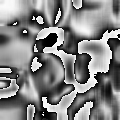

Image similarity: 0.21369506433133445


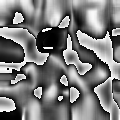

In [ ]:
#natrally this leads to some information loss 4D to 2D
gray_org = cv2.cvtColor(gramian_img_cv_steps_feat_4c_org, cv2.COLOR_BGRA2GRAY)
gray_gen_1 = cv2.cvtColor(gramian_img_cv_steps_feat_4c_gen_1, cv2.COLOR_BGRA2GRAY)
gray_gen_2 = cv2.cvtColor(gramian_img_cv_steps_feat_4c_gen_2, cv2.COLOR_BGRA2GRAY)

ssim_org_gen_1 = dist.ssim_grey(gray_org,gray_gen_1)
ssim_org_gen_2 = dist.ssim_grey(gray_org,gray_gen_2)


###### *Similarity Histogram (image)*

In [ ]:
print("\nThere are countless combinations to test, here I will just test a few, in the recipe section, more will be done. \n")

print("Recurrence")

print(dist.image_histogram_similarity(visu.array_3d_to_rgb_image(rp_sff_3d_org), visu.array_3d_to_rgb_image(rp_sff_3d_gen_1) ))
print(dist.image_histogram_similarity(visu.array_3d_to_rgb_image(rp_sff_3d_org), visu.array_3d_to_rgb_image(rp_sff_3d_gen_2)))

print("Gramian")

print(dist.image_histogram_similarity(visu.array_4d_to_rgba_image(gaf_isff_4d_org,transpose=True), visu.array_4d_to_rgba_image(gaf_isff_4d_gen_1,transpose=True)))
print(dist.image_histogram_similarity(visu.array_4d_to_rgba_image(gaf_isff_4d_org), visu.array_4d_to_rgba_image(gaf_isff_4d_gen_2)))

print("Markov")

print(dist.image_histogram_similarity(visu.array_4d_to_rgba_image(mtf_fsdd_4d_org), visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_1)))
print(dist.image_histogram_similarity(visu.array_4d_to_rgba_image(mtf_fsdd_4d_org), visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_2)))


There are countless combinations to test, here I will just test a few, in the recipe section, more will be done. 

Recurrence
25.758089344255847
17.455374649851166
Gramian
62.81954251564556
26.42637916221214
Markov
21.796555777232328
16.79413495092855


###### *Hash Similarity (image)*

In [ ]:
print(dist.hash_simmilarity(visu.array_4d_to_rgba_image(mtf_fsdd_4d_org),  visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_1)))
print(dist.hash_simmilarity(visu.array_4d_to_rgba_image(mtf_fsdd_4d_org),  visu.array_4d_to_rgba_image(mtf_fsdd_4d_gen_2)))


51.5625
40.625


###### Distance Matrix Hypothesis Tests

In [ ]:
## have to use distance matrix

pvalue, stat = dist.distance_matrix_tests(pwd_ss_2d_org,pwd_ss_2d_gen_1)
print(pvalue)
print(stat)

pvalue_2, stat_2 = dist.distance_matrix_tests(pwd_ss_2d_org,pwd_ss_2d_gen_2)

print(pvalue_2)
print(stat_2)

## mantel, proscrutes, rda -- all pvalue 0.0 for similarity
## mantel, proscrutes, rda -- highest/lowest stats, 1, 0, 1. 
## values to focus on -- mantel, proscrutes

{'mantel': 0.0, 'procrustes': 0.0, 'rda': 0.0}
{'mantel': 0.5997575529089316, 'procrustes': 0.4923718783749672, 'rda': 1.000000000003562}
{'mantel': 0.0, 'procrustes': 0.0, 'rda': -0.0}
{'mantel': 0.862124217928853, 'procrustes': 0.13215320039660494, 'rda': 0.9999999999636482}


###### Dissimilarity Measures

In [ ]:
diss_np_one = dist.entropy_dissimilarity(org.var(axis=0),gen_1.var(axis=0)); print(diss_np_one)
diss_np_one = dist.entropy_dissimilarity(org.var(axis=0),gen_2.var(axis=0)); print(diss_np_one)
diss_np_one = dist.entropy_dissimilarity(org.var(axis=0),org.var(axis=0)); print(diss_np_one)

OrderedDict([('incept_multi', 0.00864), ('cent_multi', 0.25087), ('corexdc_multi', 0.14649), ('ctcdc_mult', 0.15839), ('mutual_mult', 0.32102), ('minfo', 0.91559)])
OrderedDict([('incept_multi', 0.07525), ('cent_multi', 0.55298), ('corexdc_multi', 0.33472), ('ctcdc_mult', 0.36192), ('mutual_mult', 0.6743), ('minfo', 3.33553)])
OrderedDict([('incept_multi', 0.0), ('cent_multi', 0.0), ('corexdc_multi', 0.0), ('ctcdc_mult', 0.0), ('mutual_mult', 0.0), ('minfo', 0.0)])


In [ ]:
diss_np_one = dist.entropy_dissimilarity(cov_ff_2d_org,cov_ff_2d_gen_1); print(diss_np_one)
diss_np_one = dist.entropy_dissimilarity(cov_ff_2d_org,cov_ff_2d_gen_2); print(diss_np_one)
diss_np_one = dist.entropy_dissimilarity(cov_ff_2d_org,cov_ff_2d_org); print(diss_np_one)

OrderedDict([('incept_multi', 0.00012), ('cent_multi', 0.59128), ('corexdc_multi', 0.35889), ('ctcdc_mult', 0.3659), ('mutual_mult', 0.46602), ('minfo', inf)])
OrderedDict([('incept_multi', 0.00554), ('cent_multi', 1.03719), ('corexdc_multi', 0.48259), ('ctcdc_mult', 0.49201), ('mutual_mult', 1.63502), ('minfo', inf)])
OrderedDict([('incept_multi', 0.0), ('cent_multi', 1e-05), ('corexdc_multi', 0.0), ('ctcdc_mult', 0.0), ('mutual_mult', 0.10743), ('minfo', 0.03521)])


###### Statistical and Geometric Measures

Some of these measures are only applicable to binary data; but they would execute regardless with all numeric datatypes. Note these are all distance measures, all similarity measures are converted into distance measures; so it is not a "correlation" metric, but a "correlation distance" metric. 

In [ ]:
gen_dist_one = dist.matrix_distance(org.var(axis=0),gen_1.var(axis=0)); gen_dist_one

OrderedDict([('correlation', 0.11409),
             ('intersection', 0.01975),
             ('renyi_divergence', 0.05478),
             ('pearson_rho', 0.81756),
             ('jensen_shannon_divergence', 0.0064),
             ('ks_statistic_kde', 0.07824),
             ('js_metric', 0.08093),
             ('dice', 0.00244),
             ('kulsinski', 0.00115),
             ('rogerstanimoto', 0.00521),
             ('russellrao', 0.0033),
             ('sokalmichener', 0.00521),
             ('sokalsneath', 0.00073),
             ('yule', 0.00075),
             ('braycurtis', 0.04149),
             ('directed_hausdorff', 0.01636),
             ('manhattan', 1.29554),
             ('chi2', 0.09509),
             ('euclidean', 0.18369),
             ('variational', 1.29554),
             ('kulczynski', 0.20253),
             ('bray', 0.04149),
             ('gower', 0.09485),
             ('hellinger', 0.13179),
             ('czekanowski', 0.05398),
             ('whittaker', 0.00497),


In [ ]:
gen_dist_two = dist.matrix_distance(org.var(axis=0),gen_2.var(axis=0)); gen_dist_two

OrderedDict([('correlation', 0.59701),
             ('intersection', 0.12822),
             ('renyi_divergence', 0.2972),
             ('pearson_rho', 1.66735),
             ('jensen_shannon_divergence', 0.03788),
             ('ks_statistic_kde', 0.26168),
             ('js_metric', 0.18228),
             ('dice', 0.00759),
             ('kulsinski', 0.00323),
             ('rogerstanimoto', 0.01101),
             ('russellrao', 0.00858),
             ('sokalmichener', 0.01101),
             ('sokalsneath', 0.00227),
             ('yule', 0.00965),
             ('braycurtis', 0.17234),
             ('directed_hausdorff', 0.02588),
             ('manhattan', 5.23572),
             ('chi2', 1.01837),
             ('euclidean', 0.55808),
             ('variational', 5.23572),
             ('kulczynski', 0.41257),
             ('bray', 0.17234),
             ('gower', 0.19068),
             ('hellinger', 0.4113),
             ('czekanowski', 0.21816),
             ('whittaker', 0.03254),


In [ ]:
# pd.DataFrame([matrix_distance(vh_org,ra,skip_bhat=True) for ra in [vh_gen, vh_gen_2]],index=["vh_gen", "vh_gen_2"])

# qr_dist = pd.DataFrame([matrix_distance(r_org,ra,skip_bhat=True) for ra in [r_gen, r_gen_2]],index=["r_gen", "r_gen_2"]) ;qr_dist

# #matrix_distance(lak_org, lak_gen,skip_bhat=True)


### Vectors

###### PCA Extraction Variance Explained (WIP)

Prediction

In [ ]:
# might have to run again if error. 
dist.pca_extract_explain(np.sort(y_pred_org.mean(axis=1)),np.sort(y_pred_gen_1.mean(axis=1)))

0  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.0643568018816038, PCA Correlation: 0.9998078510701884, p-value: 5.9625192565432934e-15


(0.0643568018816038, 0.9998078510701884, 5.9625192565432934e-15)

In [ ]:
dist.pca_extract_explain(np.sort(y_pred_org.mean(axis=1)),np.sort(y_pred_gen_2.mean(axis=1)))

0  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.085637515841627, PCA Correlation: 0.9994827596477683, p-value: 3.1295224068205994e-13


(0.085637515841627, 0.9994827596477683, 3.1295224068205994e-13)

Volume

*Has an issue, try running again. Issue to be resolved.*

```
for i in range(0,100):
    while True:
        try:
            dist.pca_extract_explain(np.sort(org[:,:,-1].flatten()),np.sort(gen_1[:,:,-1].flatten()),prop=0.001)
        except:
            continue
        break


In [ ]:
dist.pca_extract_explain(np.sort(org[:,:,-1].flatten()),np.sort(gen_1[:,:,-1].flatten()),prop=0.001)

0  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.1775102090112447, PCA Correlation: 0.9682734804454816, p-value: 4.2661543859227144e-06


(0.1775102090112447, 0.9682734804454816, 4.2661543859227144e-06)

In [ ]:
dist.pca_extract_explain(np.sort(org[:,:,-1].flatten()),np.sort(gen_2[:,:,-1].flatten()),prop=0.001)

0  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.21138632802803708, PCA Correlation: 0.9211988214278549, p-value: 0.00015326319635910907


(0.21138632802803708, 0.9211988214278549, 0.00015326319635910907)

Price

In [ ]:
dist.pca_extract_explain(np.sort(org[:,:,-2].flatten()),np.sort(gen_1[:,:,-2].flatten()),prop=0.001)

1  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.2034404137506644, PCA Correlation: 0.9761720780883758, p-value: 1.3704089952372283e-06


(0.2034404137506644, 0.9761720780883758, 1.3704089952372283e-06)

In [ ]:
dist.pca_extract_explain(np.sort(org[:,:,-2].flatten()),np.sort(gen_2[:,:,-2].flatten()),prop=0.001)

1  variables are found to be almost constant
0  variables are found to be almost constant
PCA Error: 0.2006316260955124, PCA Correlation: 0.9563985269396188, p-value: 1.4999482980993353e-05


(0.2006316260955124, 0.9563985269396188, 1.4999482980993353e-05)

###### Statistical and Geometric Distances

In [ ]:
# Looking at sorted volume 
vect_org_dist = dist.vector_distance_boots(np.sort(org[:,:,-1].flatten()), np.sort(gen_1[:,:,-1].flatten()))
vect_org_dist.head()

,braycurtis,canberra,correlation,cosine,dice,euclidean,kulsinski,manhattan,rogerstanimoto,russellrao,sokalmichener,sokalsneath,sqeuclidean,yule,ks_statistic
Iteration_0,0.097486,307.663160,0.032551,0.019300,0.585257,1.581588,0.940531,29.530277,0.335673,0.928537,0.335673,0.849500,2.501419,0.327399,0.219818
Iteration_1,0.097017,307.169339,0.028680,0.017796,0.563884,1.536226,0.938245,28.739468,0.319390,0.926508,0.319390,0.837974,2.359990,0.285879,0.223235
Iteration_2,0.098624,299.697575,0.030059,0.018564,0.549365,1.671335,0.933621,30.470486,0.323688,0.920804,0.323688,0.829827,2.793360,0.278059,0.198178
Iteration_3,0.095659,316.284215,0.029099,0.017623,0.575477,1.517740,0.939508,28.665011,0.328010,0.927640,0.328010,0.844293,2.303535,0.307578,0.219818
Iteration_4,0.098230,317.196865,0.030556,0.018935,0.565435,1.599562,0.938481,29.116234,0.320183,0.926755,0.320183,0.838829,2.558597,0.288142,0.228929


In [ ]:
vect_org_dist = dist.vector_distance_boots(np.sort(org[:,:,-1].flatten()), np.sort(gen_2[:,:,-1].flatten()))
vect_org_dist.mean()

braycurtis         0.164009
canberra                NaN
correlation        0.066517
cosine             0.040989
dice               0.542109
euclidean          2.770449
kulsinski          0.929610
manhattan         53.064199
rogerstanimoto     0.332885
russellrao         0.915530
sokalmichener      0.332885
sokalsneath        0.825565
sqeuclidean        7.682966
yule               0.279827
ks_statistic       0.185984
dtype: float64

In [ ]:
## and predictions
vect_org_dist = dist.vector_distance_boots(np.sort(y_pred_org.mean(axis=1)), np.sort(y_pred_gen_1.mean(axis=1)))
vect_org_dist.mean()

braycurtis        0.002851
canberra          0.143016
correlation       0.000104
cosine            0.000020
dice              0.160211
euclidean         0.014831
kulsinski         0.522426
manhattan         0.037624
rogerstanimoto    0.352633
russellrao        0.420888
sokalmichener     0.352633
sokalsneath       0.428027
sqeuclidean       0.000229
yule              0.226334
ks_statistic      0.138813
dtype: float64

In [ ]:
vect_org_dist = dist.vector_distance_boots(np.sort(y_pred_org.mean(axis=1)), np.sort(y_pred_gen_2.mean(axis=1)))
vect_org_dist.mean()

braycurtis        0.011181
canberra          0.310882
correlation       0.000050
cosine            0.000036
dice              0.164691
euclidean         0.048297
kulsinski         0.524293
manhattan         0.151253
rogerstanimoto    0.360032
russellrao        0.421125
sokalmichener     0.360032
sokalsneath       0.434238
sqeuclidean       0.002338
yule              0.257118
ks_statistic      0.263040
dtype: float64

###### *Geometric Distribution Distances Feature Map*

In [ ]:
vect_gen_dens_dist, vect_org_dens_dist = dist.distribution_distance_map(pd.DataFrame(org.mean(axis=(1)),columns=f_names),pd.DataFrame(gen_1.mean(axis=(1)),columns=f_names),f_names)

vect_gen_dens_dist

,Open,High,Low,Close,Adj_Close,Volume
braycurtis,0.589889,0.584746,0.594174,0.583461,0.585867,0.728185
canberra,10.058188,9.880003,10.081572,9.894211,9.911568,14.226843
correlation,0.854219,0.831880,0.824730,0.840376,0.834233,1.143249
cosine,0.321988,0.314664,0.303144,0.316486,0.308467,0.534228
dice,-0.235562,-0.231349,-0.224299,-0.228147,-0.240426,-0.482709
euclidean,17.232640,16.812168,16.884306,16.707568,16.981922,31.591094
kulsinski,-169.786990,-1.652753,-0.941067,3.320150,-2.411334,3.658378
manhattan,38.525765,37.288133,38.189649,37.230479,37.912749,78.497319
rogerstanimoto,-193.679149,-1.047118,-0.228335,3.273811,-1.202421,3.367134
russellrao,-1.016686,-0.964567,-0.968334,-0.959133,-1.010038,-2.989966


In [ ]:
vect_gen_dens_dist_2, _ = dist.distribution_distance_map(pd.DataFrame(org.mean(axis=(1)),columns=f_names),pd.DataFrame(gen_2.mean(axis=(1)),columns=f_names),f_names)

(vect_gen_dens_dist_2.mean()/vect_gen_dens_dist.mean()).head()

Open        -1.172019
High         1.988453
Low          2.220426
Close        1.816028
Adj_Close    2.167666
dtype: float64

In [ ]:
vect_gen_dens_dist.mean()

Open        -22.594900
High         13.595729
Low          12.309797
Close        14.545752
Adj_Close    13.256927
Volume       19.385212
dtype: float64

In [ ]:
vect_gen_dens_dist_2.mean()

Open         26.481642
High         27.034474
Low          27.333000
Close        26.415488
Adj_Close    28.736594
Volume       38.793709
dtype: float64

###### Curve Metrics

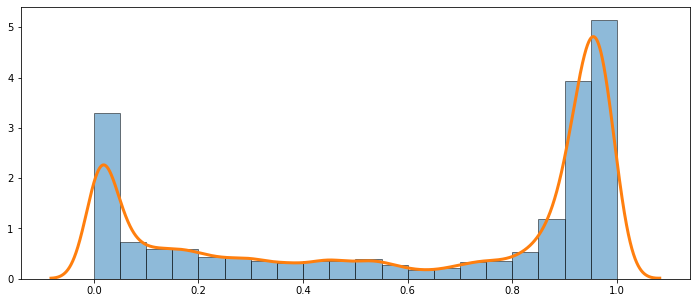

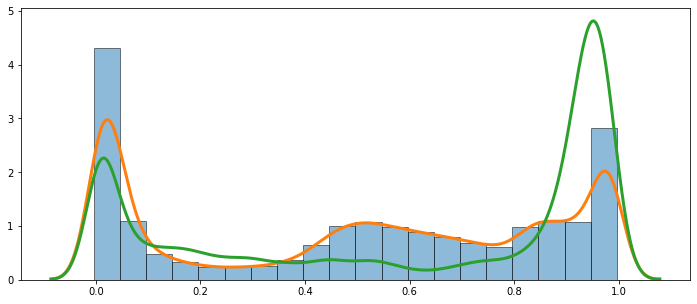

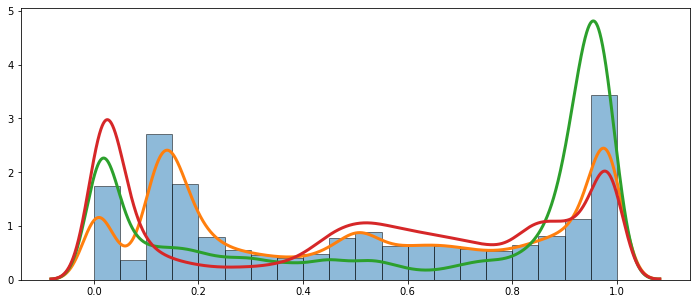

In [ ]:
from statsmodels.nonparametric import bandwidths

single_vect_org = org.flatten()
single_vect_gen = np.double(gen_1.flatten())
single_vect_gen_2 = np.double(gen_2.flatten())

bw_big = bandwidths.select_bandwidth(single_vect_gen, "normal_reference", dist.kernel_switch["gau"]())
pl, support_org, density_org, kde_org = dist.kde_func(single_vect_org, bw_big)
pl, support_gen, density_gen, kde_gen = dist.kde_func(single_vect_gen, bw_big, [np.double(density_org)] )
pl, support_gen_2, density_gen_2, kde_gen_2 = dist.kde_func(single_vect_gen_2, bw_big, [density_org, density_gen] )

In [ ]:
matrix_org = np.array([support_org,density_org]).T
matrix_gen_1 = np.array([support_gen,density_gen]).T
matrix_gen_2 = np.array([support_gen_2,density_gen_2]).T

choice = np.random.choice(len(matrix_gen_1), int(len(matrix_gen_1)*.0005), replace=False)
choice.sort()

matrix_org_s = matrix_org[choice,:]
matrix_gen_s_1 = matrix_gen_1[choice,:]
matrix_gen_s_2 = matrix_gen_2[choice,:]

len(matrix_org_s)

524

In [ ]:
dist.curve_metrics(matrix_org_s, matrix_gen_s_1)

{'Area Between Curves': 0.60937,
 'Curve Length Difference': 25.05818,
 'Discrete Frechet Distance': 2.04475,
 'Dynamic Time Warping': 210.27023,
 'Mean Absolute Difference': 0.52755,
 'Partial Curve Mapping': 157.43363}

In [ ]:
dist.curve_metrics(matrix_org_s,matrix_gen_s_2)

{'Area Between Curves': 0.65137,
 'Curve Length Difference': 22.35063,
 'Discrete Frechet Distance': 2.34792,
 'Dynamic Time Warping': 163.36562,
 'Mean Absolute Difference': 0.54571,
 'Partial Curve Mapping': 143.02197}

###### *Curve Metrics Feature Map*

In [ ]:
## lets just look at feature distribution accross all time steps

df_org_2d_flat = pd.DataFrame(org.reshape(-1, org.shape[-1]),columns=f_names)
df_gen_1_2d_flat = pd.DataFrame(gen_1.reshape(-1, gen_1.shape[-1]),columns=f_names)
df_gen_2_2d_flat = pd.DataFrame(gen_2.reshape(-1, gen_2.shape[-1]),columns=f_names)

frac = 0.05
vect_org_dens_curve = dist.curve_kde_map(df_org_2d_flat.sample(frac=frac).astype('double'),df_org_2d_flat.sample(frac=frac).astype('double'), f_names, 0.01)


Open
High
Low
Close
Adj_Close
Volume


In [ ]:
vect_org_dens_curve

,Open,High,Low,Close,Adj_Close,Volume
Curve Length Difference,0.196647,0.176839,0.218652,0.206462,0.192398,0.302082
Partial Curve Mapping,0.088196,0.089555,0.099813,0.082698,0.087580,0.300249
Discrete Frechet Distance,0.039864,0.038870,0.045116,0.042458,0.042028,0.089944
Dynamic Time Warping,0.958553,0.868648,1.031630,0.948654,0.919406,1.890692
Area Between Curves,0.016872,0.015704,0.016862,0.015867,0.015907,0.030590


In [ ]:
vect_gen_1_dens_curve = dist.curve_kde_map(df_org_2d_flat.sample(frac=frac).astype('double'),df_gen_1_2d_flat.sample(frac=frac).astype('double'), f_names, 0.01)

Open
High
Low
Close
Adj_Close
Volume


###### Hypotheses Distance

In [ ]:
dict_sta, dict_pval  = dist.vector_hypotheses(matrix_org[:, 1],matrix_gen_1[:, 1])
print("Statistic")
print(dict_sta)
print("P-Value")
print(dict_pval)


Statistic
{'pearsonr': 0.6489227957382259, 'ranksums': -267.40109998538, 'mood': 74.66159732420131, 'fligner': 18979.312108773225, 'ansari': 547045501353.0, 'bartlett': 299084.5868101086, 'levene': 15724.282328938525, 'mannwhitneyu': 432539640953.0}
P-Value
{'pearsonr': 0.0, 'ranksums': 0.0, 'mood': 0.0, 'fligner': 0.0, 'ansari': 3.880810985159465e-35, 'bartlett': 0.0, 'levene': 0.0, 'mannwhitneyu': 0.0}


In [ ]:
dict_sta, dict_pval  = dist.vector_hypotheses(matrix_org[:, 1],matrix_gen_2[:, 1])
print("Statistic")
print(dict_sta)
print("P-Value")
print(dict_pval)

Statistic
{'pearsonr': 0.6136596508280285, 'ranksums': -439.7773048093029, 'mood': 407.94089755681586, 'fligner': 5289.40776458407, 'ansari': 453369210451.0, 'bartlett': 397571.77489180083, 'levene': 35603.11530689389, 'mannwhitneyu': 356977950909.0}
P-Value
{'pearsonr': 0.0, 'ranksums': 0.0, 'mood': 0.0, 'fligner': 0.0, 'ansari': 0.0, 'bartlett': 0.0, 'levene': 0.0, 'mannwhitneyu': 0.0}
